**A little background** :
After recording the electric fields and the magnetic fields at the surface, we process them and estimate the transfer function in frequency domain. These transfer functions are complex qunatities and we split them into amplitude (called apparent resistivity in the MT community) and phase. Therefore, at any station, we have apparent resistivity $\rho_a$ and phase $\phi$ observed at different frequencies.
As an eg., if we have the data at 50 different frequencies, we have $\rho_a$ as a 50-element vector and the same for $\phi$. We combine them to form
$$
y = [\rho_a \quad \phi]
$$



Without going into the derivation, this data is observed for a particular conductivity structure $x$. We can solve the governing PDEs to obtain the above transfer functions. Fortunately, in 1D we have a sort of an analytical soln and it's easy to do the following mapping:
$$
F : x \rightarrow y
$$

We want to solve the inverse problem, that is, for a given realization of data $y_{obs}$, we want to infer $x$. This inverse problem is ill-posed and suffers from non-uniqueness. For the sake of completeness, we solve the following optimization problem:
$$
\underset{x}{\operatorname{argmin}} \; |(y_{obs} - F(x))|_2^2 + \mu L|x|_2^2
$$
where $L$ is usually the derivative matrix.

The Bayesian perspective is to obtain the posterior :
$$
p(x|y_{obs}) \propto p(y_{obs}|x) p(x)
$$

This is our objective : obtaining the posterior on $x$.

**Generative AI** :
One objective of generative modeling frameworks (GANs, Normalizing Flows, VAEs, Diffusion models) is to learn a distribution and generate samples from it. An example of generative models would be to learn a distribution of cat images and generate another image of a cat.

The conditional variants of the same, learn to generate samples given a certain distribution. An example of the conditional generative models would be to generate a better quality image given a noisy/ low resolution image. We can generate multiple images for a given input image and obtain a posterior distribution of the better quality image.

# Objective
The hope is to learn a conditional model that, when given a data $y_{obs}$, generates a family of models that fit the data.

**Some additional notes** :
* I didn't talk about errors in data but they have a big hand, eg. You want to constrain the posterior on $x_1 + x_2 = y$ such that $x_1 = x_2$. If errors are small, i.e., $y_{obs} = 4 \pm 0.01$, $x_1, x_2$ would be bound tight, but if errors are large, i.e., $y_{obs} = 4 \pm 1$, $x_1, x_2$ will have wider posteriors.
* I did not mention much about frequencies but simple physics tells us the higher frequencies attenuate faster and therefore provide more information on shallow structure and vice versa for shorter frequencies. *In principle*, you can get the same vector $y_{obs}$ from two sites but if they operate on different frequencies, they are not inferring the same conductivity distribution.
* We are employing analytical solution in 1D, which does not exist in 2D and 3D. It would be nice to use an FD solver, even for 1D, which shows proof of concept for the PDE.

In [ ]:
!pip install gdown

In [ ]:
!gdown -O 'data_mt.jld2' 1hxL-_UtuQ1wDmtaX9aJui7-tBRoXAgTm

Downloading...
From: https://drive.google.com/uc?id=1hxL-_UtuQ1wDmtaX9aJui7-tBRoXAgTm
To: /content/data_mt.jld2
100% 8.92M/8.92M [00:00<00:00, 138MB/s]


In [ ]:
import h5py
import numpy as np

In [ ]:
with h5py.File('data_mt.jld2', 'r') as f:
    keys_ = list(f.keys())
    data_appres = np.array(f['data_appres'])
    data_phase = np.array(f['data_phase'])
    x = np.array(f['data_m'])
    omega_grid = np.array(f['ω_grid'])
    mu_vec = np.array(f['μ_vec'])

In [ ]:
omega_grid

array([6.2831854e+02, 4.9909116e+02, 3.9644220e+02, 3.1490521e+02,
       2.5013811e+02, 1.9869177e+02, 1.5782648e+02, 1.2536603e+02,
       9.9581779e+01, 7.9100616e+01, 6.2831852e+01, 4.9909115e+01,
       3.9644218e+01, 3.1490522e+01, 2.5013811e+01, 1.9869177e+01,
       1.5782648e+01, 1.2536603e+01, 9.9581776e+00, 7.9100618e+00,
       6.2831855e+00, 4.9909115e+00, 3.9644220e+00, 3.1490524e+00,
       2.5013812e+00, 1.9869176e+00, 1.5782648e+00, 1.2536603e+00,
       9.9581778e-01, 7.9100615e-01, 6.2831855e-01, 4.9909115e-01,
       3.9644220e-01, 3.1490523e-01, 2.5013810e-01, 1.9869177e-01,
       1.5782648e-01, 1.2536603e-01, 9.9581778e-02, 7.9100616e-02,
       6.2831856e-02, 4.9909115e-02, 3.9644219e-02, 3.1490523e-02,
       2.5013812e-02, 1.9869177e-02, 1.5782649e-02, 1.2536603e-02,
       9.9581778e-03, 7.9100616e-03, 6.2831854e-03, 4.9909116e-03,
       3.9644218e-03, 3.1490522e-03, 2.5013811e-03, 1.9869176e-03,
       1.5782648e-03, 1.2536603e-03, 9.9581771e-04, 7.9100614e

In [ ]:
data_appres.shape

(10000, 61)

In [ ]:
data_phase.shape

(10000, 61)

In [ ]:
x.shape

(10000, 50)

In [ ]:
mu_vec.shape

(10000,)

In [ ]:
data_phase

array([[21.61603 , 22.931587, 25.230162, ..., 40.322384, 40.777267,
        41.193188],
       [47.90693 , 48.482365, 49.042118, ..., 45.339146, 45.30179 ,
        45.26859 ],
       [45.84329 , 45.64911 , 45.219097, ..., 46.55551 , 46.39198 ,
        46.245094],
       ...,
       [44.957867, 44.492016, 43.83228 , ..., 45.145752, 45.13024 ,
        45.11635 ],
       [59.709747, 59.14241 , 59.08873 , ..., 56.45357 , 55.616882,
        54.80376 ],
       [39.468388, 38.78762 , 38.698353, ..., 14.48943 , 14.847454,
        15.387113]], dtype=float32)

`data_appres` and `data_phase` constitute the data, i.e., the `y` part and `x` consists the conductivity model (values are in log-scale, which again is a conventional wisdom from MT community that conductivity on log-scale behave better). `data_appres` also contains the values which vary on the same scale as conductivity, so if you want, you can convert them to log-scale.

In the above, I have 10,000 samples, and for $x \in \mathbb{R}^m$ and $y \in \mathbb{R}^n$, we have `m = 50`, `n=122`, 61 each from appres and phase.

# Initialize Dataset

Initialize the MT dataset with a prior X and a posterior Y consisting of the resistivity and phase concatenated

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class mt_dataset(Dataset):
    def __init__(self, x: np.ndarray, y_appres: np.ndarray, y_phase: np.ndarray, device='cpu'):
        #convert from double to float
        self.y_appres_tensor = torch.from_numpy(y_appres).float().to(device)
        self.y_phase_tensor = torch.from_numpy(y_phase).float().to(device)
        self.x_tensor = torch.from_numpy(x).float().to(device)

        self.n_samples, self.dim_x = self.x_tensor.shape
        self.num_freqs = self.y_appres_tensor.shape[1]

        # Concatenate the appres and phase to form y
        self.y = torch.cat((self.y_appres_tensor, self.y_phase_tensor), axis=1)
        self.x = self.x_tensor
        self.device = device

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.y[idx, :], self.x[idx, :]





# Model Implementation

We will create an conditional variable auto encoder(CVAE)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Conditional_VAE(nn.Module):
  """
  Conditional Variational Autoencoder (CVAE)
  Encoder sees x (ground truth) + conditioning c.
  Decoder reconstructs x using z + c.
  """
  def __init__(self, latent_dim=64, device="cuda"):
    super().__init__()
    self.device = device
    self.latent_dim = latent_dim


    # Encoder: x -> latent
    self.encoder = nn.Sequential(
        nn.Conv1d(1, 16, kernel_size=5, stride=2, padding=2),
        nn.BatchNorm1d(16),
        nn.GELU(),
        nn.Dropout1d(p=0.1),
        nn.Conv1d(16, 32, kernel_size=5, stride=2, padding=2),
        nn.BatchNorm1d(32),
        nn.GELU(),
        nn.Dropout1d(p=0.1),
        nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=2),
        nn.BatchNorm1d(64),
        nn.GELU(),
        nn.Dropout1d(p=0.1)
    )

    self.encoder_output_dim = 64 * 15 # flatten size
    self.fc_mu = nn.Linear(self.encoder_output_dim, self.latent_dim)
    self.fc_logvar = nn.Linear(self.encoder_output_dim, self.latent_dim)

    # Conditioning projection for cross-attention
    self.condition_proj = nn.Linear(1, self.latent_dim)
    self.cross_attention = nn.MultiheadAttention(embed_dim=self.latent_dim, num_heads=2)

    # Decoder: z + conditioning -> x reconstruction

    # TODO: this a for loop of decoder layers and then player wit
    self.decoder_blocks = [latent_dim, 128, 64, 32, 16, 8, 4, 2, 1]
    self.upsample = [20, 25, 30, 35, 40, 45, 54]

    self.decoder = nn.Sequential()

    for block_idx in range(len(self.upsample)):
        in_channels = self.decoder_blocks[block_idx]
        out_channels = self.decoder_blocks[block_idx + 1]

        block = nn.Sequential(
          nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),
          nn.BatchNorm1d(out_channels),
          nn.GELU(),
          nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
          nn.BatchNorm1d(out_channels),
          nn.GELU(),
          nn.Upsample(size=self.upsample[block_idx], mode="linear", align_corners=True),
        )

        self.decoder.add_module(f"decoder_block_{block_idx}", block)

    # Final block
    self.decoder.add_module("Last_decoder_block", nn.Conv1d(2, 1, kernel_size=5))

  def encode(self, x):
      # x: [B, 50]
      x = x.unsqueeze(1)  # [B, 1, 50]
      batch = x.size(0)
      h = self.encoder(x)  # [B, 64, 12]
      #print("h before flatten", h.shape)
      h_flat = h.view(batch, -1)
      mu = self.fc_mu(h_flat)
      logvar = self.fc_logvar(h_flat)
      return mu, logvar

  def reparameterize(self, mu, logvar):
      std = torch.exp(0.5 * logvar)
      eps = torch.randn_like(std)
      return mu + eps * std, logvar

  def decode(self, z, c):
      # z: [B, latent_dim]
      # c: [B, 122]
      batch = z.size(0)
      # Project latent to sequence for cross-attention
      z_seq = z.unsqueeze(1).repeat(1, 12, 1).permute(1, 0, 2)  # [12, B, latent_dim]

      # Project conditioning
      c_seq = c.unsqueeze(-1)  # [B, 122, 1]
      c_seq = self.condition_proj(c_seq)  # [B, 122, latent_dim]
      c_seq = c_seq.permute(1, 0, 2)  # [122, B, latent_dim]

      attn_output, _ = self.cross_attention(query=z_seq, key=c_seq, value=c_seq)
      x_dec = attn_output.permute(1, 2, 0)  # [B, latent_dim, 12]
      x_rec = self.decoder(x_dec)  # [B, 1, 50]
      return x_rec.squeeze(1)  # [B, 50]

  def forward(self, x, c):
      mu, logvar = self.encode(x)
      z, std = self.reparameterize(mu, logvar)
      x_rec = self.decode(z, c)
      return x_rec, mu, logvar

  def sample(self, c, batch_size=None):
      if batch_size is None:
          batch_size = c.size(0)
      z = torch.randn(batch_size, self.latent_dim).to(self.device)
      x_gen = self.decode(z, c)
      return x_gen



Initialize dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# 2. Convert data to log-scale
data_appres_log = np.log(data_appres)
data_phase_log = np.log(data_phase)
# x already in log-scale

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 5. Instantiate the mt_dataset with processed (log-scaled) arrays
dataset = mt_dataset(x=x, y_appres=data_appres_log, y_phase=data_phase_log, device=device) # Use x directly as it's already log-scaled

# 6. Print the shape of dataset.x and dataset.y
print(f"Shape of dataset.x: {dataset.x.shape}")
print(f"Shape of dataset.y: {dataset.y.shape}")
print(dataset.x.device)

Shape of dataset.x: torch.Size([10000, 50])
Shape of dataset.y: torch.Size([10000, 122])
cuda:0


# Task
## Initialize Model, Optimizer, and DataLoader

Initialize the `Unet1D` model, optimize, and dataloader for `mt_dataset`. Move the model to the appropriate device (CPU/GPU).


## Initialize Model, Optimizer, and DataLoader

### Subtask:
Initialize the `Unet1D` model, an optimizer (e.g., Adam), and a `DataLoader` for the `mt_dataset`. Move the model to the appropriate device (CPU/GPU).


In [ ]:
import torch.optim as optim

# 1. Determine input dimensions from the dataset
x_dim = dataset.dim_x
y_dim = dataset.y.shape[1] # Use the shape of the concatenated y for y_dim

# 2. Define the computational device
print(f"Using device: {device}")

Using device: cuda


Define training params

In [ ]:
# Set batch_size, epochs, and # of diffusion steps
batch_size = 128
epochs = 100

#init the CVAE
model = Conditional_VAE(latent_dim=256, device=device).to(device)

# 6. Initialize the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 7. Create a DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print(f"Optimizer: {optimizer}")
print(f"DataLoader created with batch_size={batch_size}")

Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
DataLoader created with batch_size=128


## Training

Implement `train` function, handling the epoch loop, batch processing, noise addition using `q_sample`, noise prediction using the `Unet1D` model, loss calculation (e.g., MSE), backpropagation, and optimizer step.


In [ ]:
import torch.distributions as D
import time
def train_cvae_model(model, dataloader, optimizer, epochs, device):
    model.train() # Set the model to training mode
    warmup_epochs = 50
    start = time.time()
    for epoch in range(epochs):
        total_loss = 0
        for y_cond, x in dataloader:
            optimizer.zero_grad()

            # Move data to the specified device
            x = x.to(device)
            y_cond = y_cond.to(device)

            prediceted, mu, logvar = model(x,y_cond)
            prediceted = prediceted.squeeze(1)

            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1).mean()
            # KL for the distribution

            # Calculate MSE (reconstruction loss)
            reconstruct_loss = 0.8 * F.mse_loss(prediceted, x) + 0.2 * F.l1_loss(prediceted, x)
            #loss = F.mse_loss(prediceted, x)
            # Perform backpropagation
            beta = min(1, epoch / warmup_epochs)
            loss = beta * kl_loss + reconstruct_loss
            loss.backward()

            # Update model parameters
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
    end = time.time()
    print(f"The time to train was {end-start}")
    print("Training complete.")

In [ ]:
train_cvae_model(model, dataloader, optimizer, epochs, device)

Epoch 1/100, Loss: 4.1219
Epoch 2/100, Loss: 4.2576
Epoch 3/100, Loss: 4.1952
Epoch 4/100, Loss: 4.0896
Epoch 5/100, Loss: 3.9967
Epoch 6/100, Loss: 3.9223
Epoch 7/100, Loss: 3.8448
Epoch 8/100, Loss: 3.8001
Epoch 9/100, Loss: 3.7980
Epoch 10/100, Loss: 3.6926
Epoch 11/100, Loss: 3.6705
Epoch 12/100, Loss: 3.6185
Epoch 13/100, Loss: 3.5853
Epoch 14/100, Loss: 3.4999
Epoch 15/100, Loss: 3.4766
Epoch 16/100, Loss: 3.4320
Epoch 17/100, Loss: 3.3823
Epoch 18/100, Loss: 3.3131
Epoch 19/100, Loss: 3.2988
Epoch 20/100, Loss: 3.2314
Epoch 21/100, Loss: 3.1768
Epoch 22/100, Loss: 3.2703
Epoch 23/100, Loss: 3.1367
Epoch 24/100, Loss: 3.0657
Epoch 25/100, Loss: 3.0434
Epoch 26/100, Loss: 3.0010
Epoch 27/100, Loss: 2.9943
Epoch 28/100, Loss: 2.8842
Epoch 29/100, Loss: 2.8456
Epoch 30/100, Loss: 2.7827
Epoch 31/100, Loss: 2.7467
Epoch 32/100, Loss: 2.6783
Epoch 33/100, Loss: 2.6477
Epoch 34/100, Loss: 2.5996
Epoch 35/100, Loss: 2.5777
Epoch 36/100, Loss: 2.5524
Epoch 37/100, Loss: 2.5068
Epoch 38/1

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

1050339

Save model weights, print architecture

In [ ]:
#save model weights
print(model)
PATH = "cvae_weights_wo_physics.pt"
torch.save(model.state_dict(), PATH)


Conditional_VAE(
  (encoder): Sequential(
    (0): Conv1d(1, 16, kernel_size=(5,), stride=(2,), padding=(2,))
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate='none')
    (3): Dropout1d(p=0.1, inplace=False)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(2,), padding=(2,))
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): GELU(approximate='none')
    (7): Dropout1d(p=0.1, inplace=False)
    (8): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(2,))
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): GELU(approximate='none')
    (11): Dropout1d(p=0.1, inplace=False)
  )
  (fc_mu): Linear(in_features=960, out_features=256, bias=True)
  (fc_logvar): Linear(in_features=960, out_features=256, bias=True)
  (condition_proj): Linear(in_features=1, out_features=256, bias=True)
  (cross_attention): MultiheadAttention(
    (out_p

Preliminary evaluation (comparing samples to ground truth)

Selected true x (conductivity model) shape: torch.Size([50])
Selected true y (data) shape: torch.Size([122])


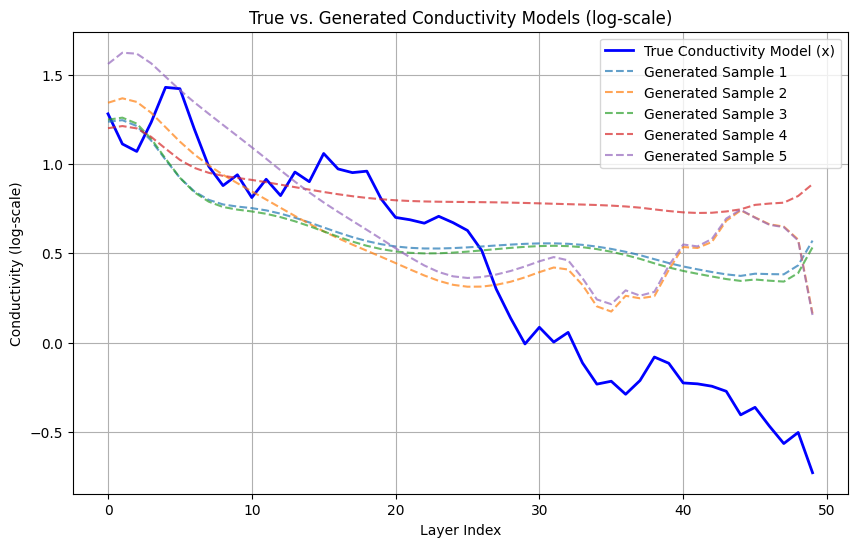

In [ ]:
import matplotlib.pyplot as plt

def p_sample_loop(model, y_cond, device):
    model.eval() # Set the model to evaluation mode
    with torch.no_grad():
        x = model.sample(y_cond)
        return x


# --- Evaluation and Visualization ---

num_samples_to_generate = 5 # Number of conductivity models to generate per y_cond

# Pick a random sample from the dataset for conditioning
#random_idx = torch.randint(0, len(dataset), (1,)).item()
idx = 120
y_cond_true , x_true = dataset[idx]

# Unsqueeze y_cond_true to match batch dimension (batch_size=1 for a single sample)
y_cond_true_batch = y_cond_true.unsqueeze(0).to(device)
x_true_batch = x_true.unsqueeze(0).to(device)

print(f"Selected true x (conductivity model) shape: {x_true.shape}")
print(f"Selected true y (data) shape: {y_cond_true.shape}")

# Generate samples
generated_x_samples = []
for _ in range(num_samples_to_generate):
    # The p_sample_loop expects the x_shape for the initial noise generation.
    # It should be (1, x_dim) since we are generating one sample at a time.
    generated_x = p_sample_loop(model, y_cond_true_batch, device)
    generated_x = generated_x.squeeze(0)
    generated_x_samples.append(generated_x.squeeze(0).cpu().numpy()) # Remove batch dim and move to CPU

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_true.cpu().numpy(), label='True Conductivity Model (x)', color='blue', linewidth=2)

for i, gen_x in enumerate(generated_x_samples):
    plt.plot(gen_x, linestyle='--', alpha=0.7, label=f'Generated Sample {i+1}')

plt.title('True vs. Generated Conductivity Models (log-scale)')
plt.xlabel('Layer Index')
plt.ylabel('Conductivity (log-scale)')
plt.legend()
plt.grid(True)
plt.show()

Generating 32 samples for evaluation... (this may take a moment)
x true  (32, 50)
x gen (32, 50)

Average KL Divergence across all 50 dimensions: 10.9521


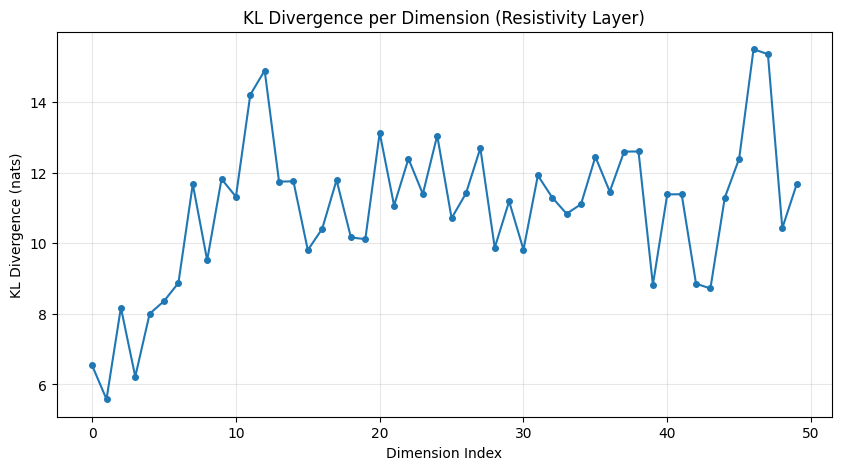

In [ ]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

def compute_kl_divergence(model, dataset, batch_size=32,device='cpu', num_bins=50):
    """
    Computes the KL divergence between the distribution of true x values and
    generated x values (conditioned on y), averaged across all dimensions.
    """
    # 1. Get a batch of data (True samples)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    y_cond_batch, x_true_batch = next(iter(dataloader))

    y_cond_batch = y_cond_batch.to(device)
    x_true_batch = x_true_batch.to(device)

    # Shape for noise generation matches the batch
    x_shape = x_true_batch.shape

    print(f"Generating {batch_size} samples for evaluation... (this may take a moment)")

    # 2. Generate samples using the diffusion model
    # We use the p_sample_loop defined in the previous cells
    x_gen_batch = p_sample_loop(model, y_cond_batch, device)

    # Convert to numpy for analysis
    x_true = x_true_batch.cpu().numpy()
    x_gen = x_gen_batch.cpu().numpy()
    #x_gen = x_gen.squeeze(1)
    print("x true ", x_true.shape)
    print("x gen", x_gen.shape)
    kl_divs = []

    # 3. Compute KL divergence for each dimension (layer)
    for i in range(x_true.shape[1]):
        # Determine bin range based on min/max of both sets to ensure coverage
        min_val = min(x_true[:, i].min(), x_gen[:, i].min())
        max_val = max(x_true[:, i].max(), x_gen[:, i].max())
        bins = np.linspace(min_val, max_val, num_bins)

        # Compute histograms (counts)
        p_hist, _ = np.histogram(x_true[:, i], bins=bins, density=False)
        q_hist, _ = np.histogram(x_gen[:, i], bins=bins, density=False)

        # Convert to probabilities
        p_probs = p_hist / (p_hist.sum() + 1e-10)
        q_probs = q_hist / (q_hist.sum() + 1e-10)

        # Add epsilon to avoid log(0)
        epsilon = 1e-10
        p_probs += epsilon
        q_probs += epsilon

        # Renormalize
        p_probs /= p_probs.sum()
        q_probs /= q_probs.sum()

        # Calculate KL(True || Generated)
        kl = entropy(p_probs, q_probs)
        kl_divs.append(kl)

    mean_kl = np.mean(kl_divs)
    return mean_kl, kl_divs

# Run the evaluation
# Note: batch_size is set to 32 to keep execution time reasonable on CPU.
kl_val, kl_per_dim = compute_kl_divergence(model, dataset, batch_size=32, device=device)
print(f"\nAverage KL Divergence across all {len(kl_per_dim)} dimensions: {kl_val:.4f}")

# Plot the KL divergence per dimension
plt.figure(figsize=(10, 5))
plt.plot(kl_per_dim, marker='o', linestyle='-', markersize=4)
plt.title('KL Divergence per Dimension (Resistivity Layer)')
plt.xlabel('Dimension Index')
plt.ylabel('KL Divergence (nats)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F

def compute_mse(model, dataset, batch_size=32, device='cpu'):
    """
    Computes the Mean Squared Error between true x and generated x.
    """
    # 1. Get a batch of data
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    y_cond_batch, x_true_batch = next(iter(dataloader))

    y_cond_batch = y_cond_batch.to(device)
    x_true_batch = x_true_batch.to(device)

    print(f"Generating {batch_size} samples for MSE computation...")

    # 2. Generate samples
    # x_shape matches x_true_batch: (batch_size, x_dim)
    x_gen_batch = p_sample_loop(model, y_cond_batch, device)
    x_gen_batch = x_gen_batch.squeeze(1)
    # 3. Compute MSE
    # Calculate MSE per sample (averaging over dimensions)
    mse_per_sample = F.mse_loss(x_gen_batch, x_true_batch, reduction='none').mean(dim=1)

    # Average over the batch
    total_mean_mse = mse_per_sample.mean().item()

    return total_mean_mse, mse_per_sample

# Run the calculation
mse_val, mse_individual = compute_mse(model, dataset, batch_size=32, device=device)

print(f"Mean Squared Error (averaged over batch): {mse_val:.6f}")
print(f"Min MSE in batch: {mse_individual.min().item():.6f}")
print(f"Max MSE in batch: {mse_individual.max().item():.6f}")

Generating 32 samples for MSE computation...
Mean Squared Error (averaged over batch): 1.102339
Min MSE in batch: 0.017423
Max MSE in batch: 5.782125


In [ ]:
def p_sample_loop_batch(model, y_cond, device, num_samples=1):
    """
    Generate `num_samples` samples per conditional input y_cond using a
    conditional diffusion model.

    Args:
        model:          conditional diffusion model
        y_cond:         (b, y_dim) tensor of conditioning inputs
        x_shape:        tuple shape of *one* sample, e.g. (b, x_dim)
                        NOTE: b is ignored; inferred from y_cond
        T:              total diffusion steps
        device:         torch device
        num_samples:    number of independent samples per y_cond

    Returns:
        x_t: tensor of shape (b, num_samples, x_dim)
    """
    model.eval()
    start = time.time()
    with torch.no_grad():
        b = y_cond.shape[0]

        # Expand y_cond to (b * num_samples, y_dim)
        y_cond_expanded = y_cond.repeat_interleave(num_samples, dim=0)


        #CVAE
        x = p_sample_loop(model, y_cond_expanded,device)
        print(x.shape)
        # Reshape back to (b, num_samples, ...)
        out_shape = (b, num_samples, 50)
        x = x.view(out_shape)
        end = time.time()
        print(f"The time to sampel 10000 was {end-start}")
        return x

In [ ]:
# Generate 10k samples to generate a visualization with

generated_x_samples = []
num_samples_to_generate = 10000

mass_samples = p_sample_loop_batch(model, y_cond_true_batch, device, num_samples = num_samples_to_generate)


torch.Size([10000, 50])
The time to sampel 10000 was 0.023684024810791016


In [ ]:
mass_samples.shape
torch.save(mass_samples, 'mass_samples_wo_physics_loss.pt')

# Physics-Informed Loss


The governing PDE is Maxwell's decoupled equation with the quasi-static approximation, $\nabla^2 u - iω\mu_0 σ u = 0$, where $\omega$ (given by data) is the angular frequency, $\mu_0$ is a constant magnetic permeability of free space, u(z) is the EM component (x) for depth level z, and $\sigma$ being
electrical conducivity, or $1/\rho$.

Thus, for physics-informed diffusion loss following the approach outlined by Bastek et al. (2025), we consider the system of PDE residual functions $f_n = \nabla^2 u - iω_n\mu_0 σ_n u$, for all $n \in N$ frequencies.


In [ ]:
def compute_laplacian(x, fx):
    """
    Helper function computing the Laplacian using the central difference formula
    and providing scalar input-output pairs.
    Inputs:
      x: B x M matrix of function inputs.
      fx: B x M matrix of function outputs.
    Returns: B x M matrix of Laplacian values
    """
    device = x.device
    B, M = x.shape #get dimensions

    laplacian = torch.zeros_like(fx,device=device)

    # Central difference for interior points
    h_forward = x[:, 2:] - x[:, 1:-1]  # h_{i+1}
    h_backward = x[:, 1:-1] - x[:, :-2]  # h_i

    # Second derivative formula for non-uniform grids
    laplacian[:, 1:-1] = 2 * (
        fx[:, :-2] / (h_backward * (h_backward + h_forward)) -
        fx[:, 1:-1] / (h_backward * h_forward) +
        fx[:, 2:] / (h_forward * (h_backward + h_forward))
    )

    # Handle boundaries with one-sided differences
    # Left boundary
    h1 = x[:, 1] - x[:, 0]
    h2 = x[:, 2] - x[:, 1]
    laplacian[:, 0] = 2 * (
        fx[:, 0] / (h1 * (h1 + h2)) -
        fx[:, 1] / (h1 * h2) +
        fx[:, 2] / (h2 * (h1 + h2))
    )

    # Right boundary
    h1 = x[:, -2] - x[:, -3]
    h2 = x[:, -1] - x[:, -2]
    laplacian[:, -1] = 2 * (
        fx[:, -3] / (h1 * (h1 + h2)) -
        fx[:, -2] / (h1 * h2) +
        fx[:, -1] / (h2 * (h1 + h2))
    )

    return laplacian


In [ ]:
MU_0 = 4 * np.pi * 1e-7

def pde_residual(u, omega, rho, mu_0 = MU_0):
  """
  Governing Maxwell's PDE rewritten as a residual function, solve for a batch of B
  samples.
  u: the field structure (B x M tensor, generally x)
  omega: angular frequency of each signal (provided in data, N/2-dim vector)
  rho: apparent resistivity of each layer. use for calculating u and sigma
    (B x N/2 matrix)
  mu_0: magnetic permeability of free space, fixed constant (float).

  Returns: B x M x N / 2 complex matrix of f_n outputs for every frequency and every depth level.
  """
  device = u.device #standardize device type
  B, M = u.size()
  num_freqs = omega.size(0) #number of frequencies, N/2
  sigma = 1 / rho #electrical conductivity (inverse of resistivity by definition)
  #take the laplacian of x with respect to depth
  #use indices for depth levels (assume linearly spaced depths)
  z = torch.arange(50, device=device).expand(B, -1).float() #B x M matrix
  #for each sample in the batch, compute laplacian with x-values from z and
  #the output values from u
  laplacians = compute_laplacian(z, u) #B-dim vector

  #expand & broadcast tensors to output dimension
  laplace_exp = torch.unsqueeze(laplacians,dim=-1).expand(-1, -1, num_freqs)  #B x M -> B x M x N / 2 matrix
  u_exp = torch.unsqueeze(u, dim=-1).expand(-1, -1, num_freqs)  #B x M -> B x M x N / 2 matrix
  omega_exp = torch.unsqueeze(torch.unsqueeze(omega, dim=0),dim=0) #N/2 -> 1 x 1 x N/2 matrix
  omega_exp = omega_exp.expand(B, M, -1) #1 x 1 x N/2 -> B x M x N / 2 matrix
  sigma_exp = torch.unsqueeze(sigma,dim=1).expand(-1, M, -1) #B x N/2 -> B x M x N / 2 matrix

  #compute & return all the outputs fo rf_n for every frequency, depth level, and sample in batch
  #1j = i
  result = laplace_exp - 1j * omega_exp * mu_0 * sigma_exp * u_exp
  return result



In [ ]:
z = torch.arange(50).expand(10, -1).float() #B x M matrix
u_batch = torch.tensor(x[:10, :])
laplacians = compute_laplacian(z, u_batch) #B-dim vector
print(laplacians.size())

torch.Size([10, 50])


In [ ]:
#testing f w/ 100 samples
u_batch = torch.tensor(x, device=device)
omega = torch.tensor(omega_grid, device=device)
rho_batch = torch.tensor(data_appres, device=device)
print(u_batch.size(), omega.size(), rho_batch.size())

out = pde_residual(u_batch, omega, rho_batch)
print(out.size())

torch.Size([10000, 50]) torch.Size([61]) torch.Size([10000, 61])
torch.Size([10000, 50, 61])


# Physics-Informed CVAE Loss

We adapt Bastek et al.'s (2025) physics-informed diffusion architecture to incorporate the governing PDE into the loss calculations. Using the previously defined pde_residual function, we calculate the complex residual vector of the governing equations for each frequency $R(x)$ and compute the physics-informed loss component as $||R||^2$, seeing as $R(x) = 0$ for the ideal solution.  

In [ ]:
import time
def train_cvae_model_physics(model, dataloader, optimizer, epochs, device, lambda_phy=0.01):
    model.train() # Set the model to training mode

    # Convert omega_grid to tensor on device (assuming omega_grid is available globally)
    omega_tensor = torch.tensor(omega_grid, device=device).float()
    start = time.time()
    for epoch in range(epochs):
        total_loss = 0
        warmup_epochs = 50
        for y_cond, x_start in dataloader:
            optimizer.zero_grad()

            # Move data to the specified device
            x = x_start.to(device)
            y_cond = y_cond.to(device)


            # predict
            prediceted, mu, logvar = model(x,y_cond)
            prediceted = prediceted.squeeze(1)


            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1).mean()
            # KL for the distribution

            # Calculate MSE (reconstruction loss)
            reconstruct_loss = 0.8 * F.mse_loss(prediceted, x) + 0.2 * F.l1_loss(prediceted, x)
            #loss = F.mse_loss(prediceted, x)
            # Perform backpropagation
            beta = min(1, epoch / warmup_epochs)


            #Physics informed loss component based on Bastek et al. (2025)
            #https://arxiv.org/pdf/2403.14404


            # 2. Compute PDE Residual R using function f
            rho = torch.exp(y_cond[:, :61]) #convert rho back to linear scale
            residual = pde_residual(prediceted, omega_tensor, rho)

            #compute loss ||R||^2
            #residual is complex, compute squared magnitude
            residual_sq = torch.abs(residual)**2
            #mean over spatial and frequency dimensions
            residual_loss = residual_sq.mean(dim=(1, 2))

            # 4. Weight by t and average over batch
            loss_phy = (residual_loss).mean()

            # Total Loss
            loss = reconstruct_loss + lambda_phy * loss_phy + beta * kl_loss

            # Perform backpropagation
            loss.backward()

            # Update model parameters
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
    end = time.time()
    print(f"The time to train was {end-start}")
    print("Training complete.")

In [ ]:
train_cvae_model_physics(model, dataloader, optimizer, epochs, device)

Epoch 1/100, Loss: 1.4151
Epoch 2/100, Loss: 1.3887
Epoch 3/100, Loss: 1.3751
Epoch 4/100, Loss: 1.3391
Epoch 5/100, Loss: 1.3642
Epoch 6/100, Loss: 1.3585
Epoch 7/100, Loss: 1.3592
Epoch 8/100, Loss: 1.3417
Epoch 9/100, Loss: 1.3412
Epoch 10/100, Loss: 1.3489
Epoch 11/100, Loss: 1.3461
Epoch 12/100, Loss: 1.3628
Epoch 13/100, Loss: 1.3351
Epoch 14/100, Loss: 1.3953
Epoch 15/100, Loss: 1.3404
Epoch 16/100, Loss: 1.3336
Epoch 17/100, Loss: 1.3516
Epoch 18/100, Loss: 1.3578
Epoch 19/100, Loss: 1.3445
Epoch 20/100, Loss: 1.3980
Epoch 21/100, Loss: 1.3464
Epoch 22/100, Loss: 1.3377
Epoch 23/100, Loss: 1.3356
Epoch 24/100, Loss: 1.3257
Epoch 25/100, Loss: 1.3205
Epoch 26/100, Loss: 1.3469
Epoch 27/100, Loss: 1.3407
Epoch 28/100, Loss: 1.3444
Epoch 29/100, Loss: 1.3255
Epoch 30/100, Loss: 1.3195
Epoch 31/100, Loss: 1.3073
Epoch 32/100, Loss: 1.3060
Epoch 33/100, Loss: 1.3168
Epoch 34/100, Loss: 1.3066
Epoch 35/100, Loss: 1.2906
Epoch 36/100, Loss: 1.2904
Epoch 37/100, Loss: 1.2877
Epoch 38/1

In [ ]:
#save model weights
print(model)
PATH = "cvae_weights_w_physics.pt"
torch.save(model.state_dict(), PATH)


Conditional_VAE(
  (encoder): Sequential(
    (0): Conv1d(1, 16, kernel_size=(5,), stride=(2,), padding=(2,))
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate='none')
    (3): Dropout1d(p=0.1, inplace=False)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(2,), padding=(2,))
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): GELU(approximate='none')
    (7): Dropout1d(p=0.1, inplace=False)
    (8): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(2,))
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): GELU(approximate='none')
    (11): Dropout1d(p=0.1, inplace=False)
  )
  (fc_mu): Linear(in_features=960, out_features=256, bias=True)
  (fc_logvar): Linear(in_features=960, out_features=256, bias=True)
  (condition_proj): Linear(in_features=1, out_features=256, bias=True)
  (cross_attention): MultiheadAttention(
    (out_p

Selected true x (conductivity model) shape: torch.Size([50])
Selected true y (data) shape: torch.Size([122])
The time to generate 5 samples was 0.017108917236328125


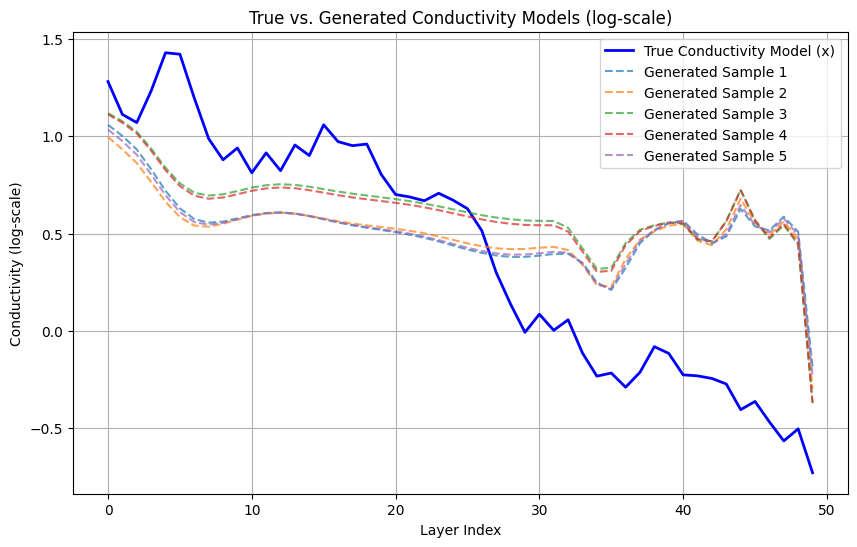

In [ ]:
num_samples_to_generate = 5 # Number of conductivity models to generate per y_cond

# Pick a random sample from the dataset for conditioning
#random_idx = torch.randint(0, len(dataset), (1,)).item()
idx = 120
y_cond_true, x_true = dataset[idx]

# Unsqueeze y_cond_true to match batch dimension (batch_size=1 for a single sample)
y_cond_true_batch = y_cond_true.unsqueeze(0).to(device)
x_true_batch = x_true.unsqueeze(0).to(device)

print(f"Selected true x (conductivity model) shape: {x_true.shape}")
print(f"Selected true y (data) shape: {y_cond_true.shape}")

# Generate samples
generated_x_samples = []
start = time.time()
for _ in range(num_samples_to_generate):
    # The p_sample_loop expects the x_shape for the initial noise generation.
    # It should be (1, x_dim) since we are generating one sample at a time.
    generated_x = p_sample_loop(model, y_cond_true_batch, device)
    generated_x = generated_x.squeeze(0)
    generated_x_samples.append(generated_x.squeeze(0).cpu().numpy()) # Remove batch dim and move to CPU
end = time.time()
print(f"The time to generate 5 samples was {end-start}")
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_true.cpu().numpy(), label='True Conductivity Model (x)', color='blue', linewidth=2)

for i, gen_x in enumerate(generated_x_samples):
    plt.plot(gen_x, linestyle='--', alpha=0.7, label=f'Generated Sample {i+1}')

plt.title('True vs. Generated Conductivity Models (log-scale)')
plt.xlabel('Layer Index')
plt.ylabel('Conductivity (log-scale)')
plt.legend()
plt.grid(True)
plt.show()

Generating 32 samples for evaluation... (this may take a moment)
x true  (32, 50)
x gen (32, 50)

Average KL Divergence across all 50 dimensions: 10.8376


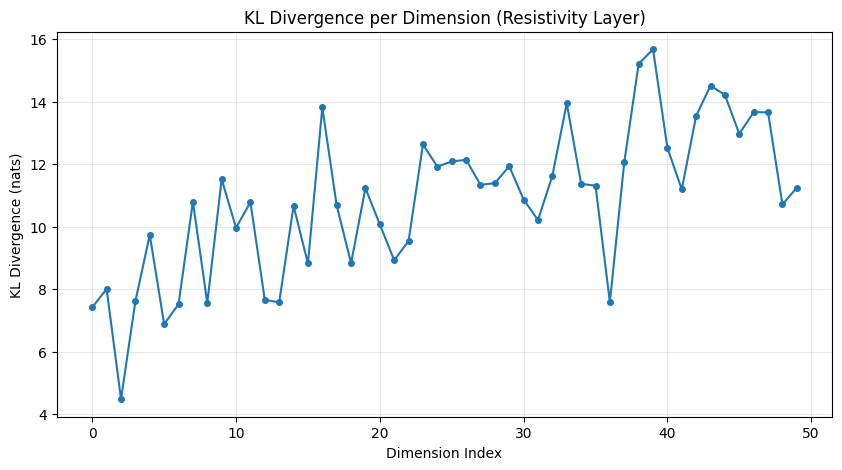

In [ ]:
# Run the evaluation
# Note: batch_size is set to 32 to keep execution time reasonable on CPU.
kl_val, kl_per_dim = compute_kl_divergence(model, dataset, batch_size=32, device=device)
print(f"\nAverage KL Divergence across all {len(kl_per_dim)} dimensions: {kl_val:.4f}")

# Plot the KL divergence per dimension
plt.figure(figsize=(10, 5))
plt.plot(kl_per_dim, marker='o', linestyle='-', markersize=4)
plt.title('KL Divergence per Dimension (Resistivity Layer)')
plt.xlabel('Dimension Index')
plt.ylabel('KL Divergence (nats)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Run the calculation
mse_val, mse_individual = compute_mse(model, dataset, batch_size=32, device=device)

print(f"Mean Squared Error (averaged over batch): {mse_val:.6f}")
print(f"Min MSE in batch: {mse_individual.min().item():.6f}")
print(f"Max MSE in batch: {mse_individual.max().item():.6f}")

Generating 32 samples for MSE computation...
Mean Squared Error (averaged over batch): 1.264525
Min MSE in batch: 0.014877
Max MSE in batch: 8.299170


In [ ]:
# Generate 10k samples to generate a visualization with

generated_x_samples = []
num_samples_to_generate = 10000

mass_samples = p_sample_loop_batch(model, y_cond_true_batch, device, num_samples = num_samples_to_generate)

torch.Size([10000, 50])
The time to sampel 10000 was 0.02150893211364746


In [ ]:
mass_samples.shape
torch.save(mass_samples, 'mass_samples_w_physics_loss.pt')